In [2]:


# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

# Original code from scikit-learn.org/stable/auto_examples/
# linear_model/plot_logistic_multinomial.html
#
# Modified for 2102541 IoT Fundamentals (C Aswakul, 24/Mar/2019):
# 1) reindenting and splitting cells for convenience in variable tracking
# 2) assigning new initial centers without using matrix transformation
# 3) focusing only on 'ovr' option of multi_class
#
# Students are suggested to try the following:
# - vary centered coordinates of data distributions (centers)
# - vary the number of samples (n_samples)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 5], [5, -5], [5, 5]]
X, y = make_blobs(n_samples=10, centers=centers, random_state=40)
print("X : ")
print(X)
print("y : ")
print(y)

multi_class = 'ovr'

clf = LogisticRegression(solver='sag', max_iter=1000, random_state=42, multi_class=multi_class).fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))



X : 
[[ 4.80099088  3.72501639]
 [-5.68460636  5.92871475]
 [ 5.58828165 -4.11475576]
 [-5.6075477   4.87386359]
 [ 5.71026699 -3.94446556]
 [-2.70750966  5.48881005]
 [ 3.98299298  4.86630697]
 [ 4.5618145   5.49344349]
 [-6.84440103  4.53299758]
 [ 5.0540731  -4.74204658]]
y : 
[2 0 1 0 1 0 2 2 0 1]
training score : 1.000 (ovr)


classifier coefficient : 
[[-0.81277155  0.13014303]
 [ 0.16628864 -0.79171001]
 [ 0.76630123  0.7568821 ]]
classifier intercept : 
[-0.46200927 -0.75450059 -4.32142565]


C:\Users\Ronakorn's Window\AppData\Local\Temp\ipykernel_18792\1764462860.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


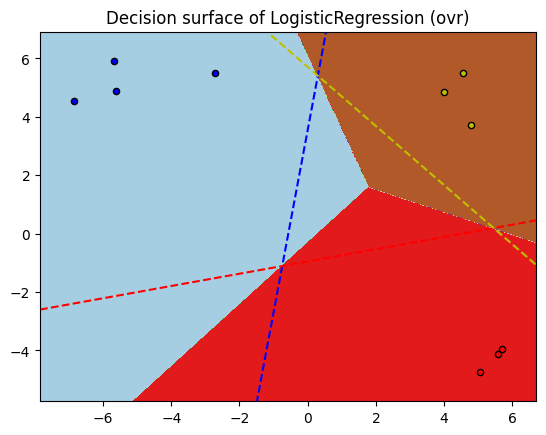

In [3]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
plt.axis('tight')

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

print("classifier coefficient : ")
print(clf.coef_)

print("classifier intercept : ")
print(clf.intercept_)

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)

plt.show()